<a href="https://colab.research.google.com/github/luimui/DataScience/blob/main/data_science_part2_basics_stack3_code_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Basics

## Recap

### Load data

In [1]:
# imports
import numpy as np
import pandas as pd
import pathlib

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# load data
# data_path = pathlib.Path("script//part2")
data_path = pathlib.Path(".")
data_titanic = pd.read_csv(data_path / "titanic.csv", index_col="PassengerId")

In [ ]:
data_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# define input
# * drop our target "Survived"
# * only select numbers
# * drop samples with undefined values (only in column "Age" in our case)
X = data_titanic.drop(columns="Survived").select_dtypes(np.number).dropna()

# define our target/output and only select those samples left in X
y = data_titanic["Survived"][X.index]

In [5]:
X.head(5)

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [6]:
# select and fit out model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [7]:
# make predictions
y_pred = model.predict(X)
y_pred[:5]

array([0, 1, 0, 1, 0])

### Split data

In [8]:
# before inspecting the data, selecting and building models, etc.
# FIRST split data into train and test data (we set the test data size to 30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Try some models

In [19]:
def evaluate(model):
    scoring = "accuracy"
    results = cross_validate(model, X_train, y_train, cv=3, scoring=scoring, return_train_score=True)
    results = pd.DataFrame(results)
    display(results)
    display(f"Train ({scoring}): {results['train_score'].mean():.02f} +/- {results['train_score'].std():.02f}")
    display(f"Test  ({scoring}): {results['test_score'].mean():.02f} +/- {results['test_score'].std():.02f}")

In [23]:
# try first model
model = LogisticRegression()
evaluate(model)

,fit_time,score_time,test_score,train_score
0,0.017632,0.002705,0.712575,0.725904
1,0.009438,0.002554,0.704819,0.711712
2,0.010949,0.002673,0.686747,0.711712


'Train (accuracy): 0.72 +/- 0.01'

'Test  (accuracy): 0.70 +/- 0.01'

In [26]:
# try second model
model = DecisionTreeClassifier()
evaluate(model)

,fit_time,score_time,test_score,train_score
0,0.006118,0.005027,0.604790,0.987952
1,0.004089,0.002520,0.590361,0.987988
2,0.002960,0.001806,0.626506,0.987988


'Train (accuracy): 0.99 +/- 0.00'

'Test  (accuracy): 0.61 +/- 0.02'

We only get an accuracy of around `0.70`.

## Let's look at the data again

Previously we only used numeric variables and dropped data with undefined values. Let's see what else we have.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# previously used data
X.head(5)

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [31]:
# available data

def f_selected(d):
    return [f'background-color: darkblue' for i in d]
def f_target(d):
    return [f'background-color: darkgreen' for i in d]

data_titanic.head(5).style\
    .apply(f_target, axis=0, subset="Survived")\
    .apply(f_selected, axis=0, subset=X.columns)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


![](./data-science_part2_basics_stack3_code_titanic.jpg)

### NAs

In [32]:
# # plot missing values (manually)
# na_counts = data_titanic.isna().sum()
# na_order = na_counts.sort_values(ascending=False).index
# na_map = data_titanic[na_order].isna()
# # na_map.insert(0, "Survived Bool", data_titanic["Survived"].astype(bool))
# na_map = na_map.sort_values(na_order.values.tolist())
# # na_map = na_map.sort_values(["Survived Bool"] + na_order.values.tolist())

# fig, ax = plt.subplots(figsize=(20,16))
# sns.heatmap(na_map)

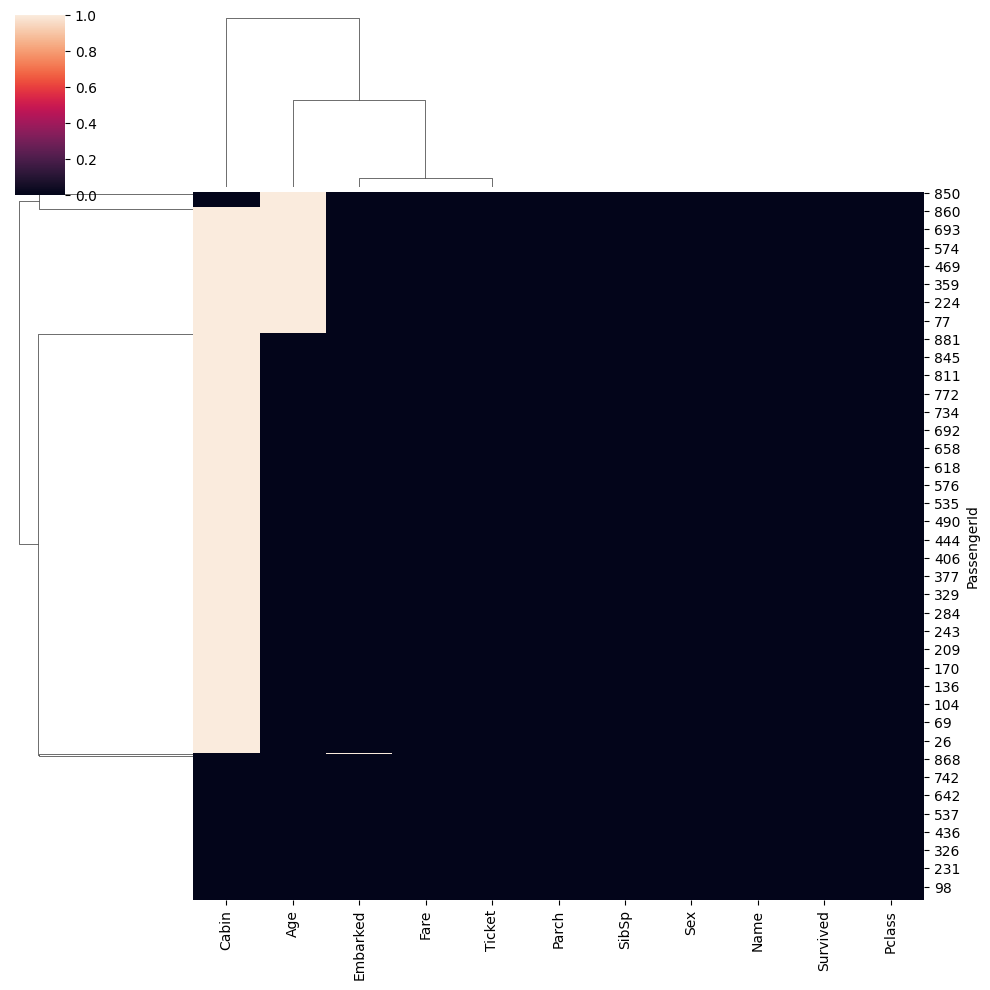

In [33]:
# look at the NA structure
# plot missing data with seaborn
sns.clustermap(data_titanic.isna())

In [34]:
data_titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Variable types

- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [35]:
for c in data_titanic.columns:
    print("###########################")
    print(c)
    print("---------------------------")
    n_unique = data_titanic[c].nunique()
    print("Unique: ", n_unique)
    if n_unique < 10:
        display(data_titanic[c].value_counts())
    print()

###########################
Survived
---------------------------
Unique:  2


0    549
1    342
Name: Survived, dtype: int64


###########################
Pclass
---------------------------
Unique:  3


3    491
1    216
2    184
Name: Pclass, dtype: int64


###########################
Name
---------------------------
Unique:  891

###########################
Sex
---------------------------
Unique:  2


male      577
female    314
Name: Sex, dtype: int64


###########################
Age
---------------------------
Unique:  88

###########################
SibSp
---------------------------
Unique:  7


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


###########################
Parch
---------------------------
Unique:  7


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


###########################
Ticket
---------------------------
Unique:  681

###########################
Fare
---------------------------
Unique:  248

###########################
Cabin
---------------------------
Unique:  147

###########################
Embarked
---------------------------
Unique:  3


S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Data preparation

### Feature extraction

In [36]:
def extract_features(data):
    """Extract features from existing variables"""

    data_extract = data.copy()

    # name
    name_only = data_extract["Name"].str.replace(r"\(.*\)", "", regex=True)
    first_name = name_only.str.split(", ", expand=True).iloc[:,1]
    title = first_name.str.split(".", expand=True).iloc[:,0]
    data_extract["Title"] = title

    # ticket

    # ...

    return data_extract

data_extract = extract_features(data_titanic)
data_extract

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


In [37]:
data_extract["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

### Preprocessing

In [39]:
def preprocess(data):
    """Convert features into numeric variables readable by our models."""

    data_preprocessed = data.copy()

    # Sex

    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex"], drop_first=True)

    # Cabin

    data_preprocessed.drop(columns="Cabin", inplace=True)

    # Embarked

    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Embarked"], dummy_na=True)

    # Title
    title = data_preprocessed["Title"]
    title_counts = title.value_counts()
    higher_titles = title_counts[title_counts < 50]
    title_groups = ["higher" if t in higher_titles else t for t in title]
    data_preprocessed["Title"] = title_groups
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Title"])

    # drop the rest
    data_preprocessed.drop(columns=["Name", "Ticket"], inplace=True)

    return data_preprocessed

data_preprocessed = preprocess(data_extract)
data_preprocessed

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_higher
PassengerId,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0
2,1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0,1,0
3,1,3,26.0,0,0,7.9250,0,0,0,1,0,1,0,0,0
4,1,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,1,0
5,0,3,35.0,0,0,8.0500,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,1,0,0,1,0,0,0,0,1
888,1,1,19.0,0,0,30.0000,0,0,0,1,0,1,0,0,0
889,0,3,NaN,1,2,23.4500,0,0,0,1,0,1,0,0,0


### Check for outliers

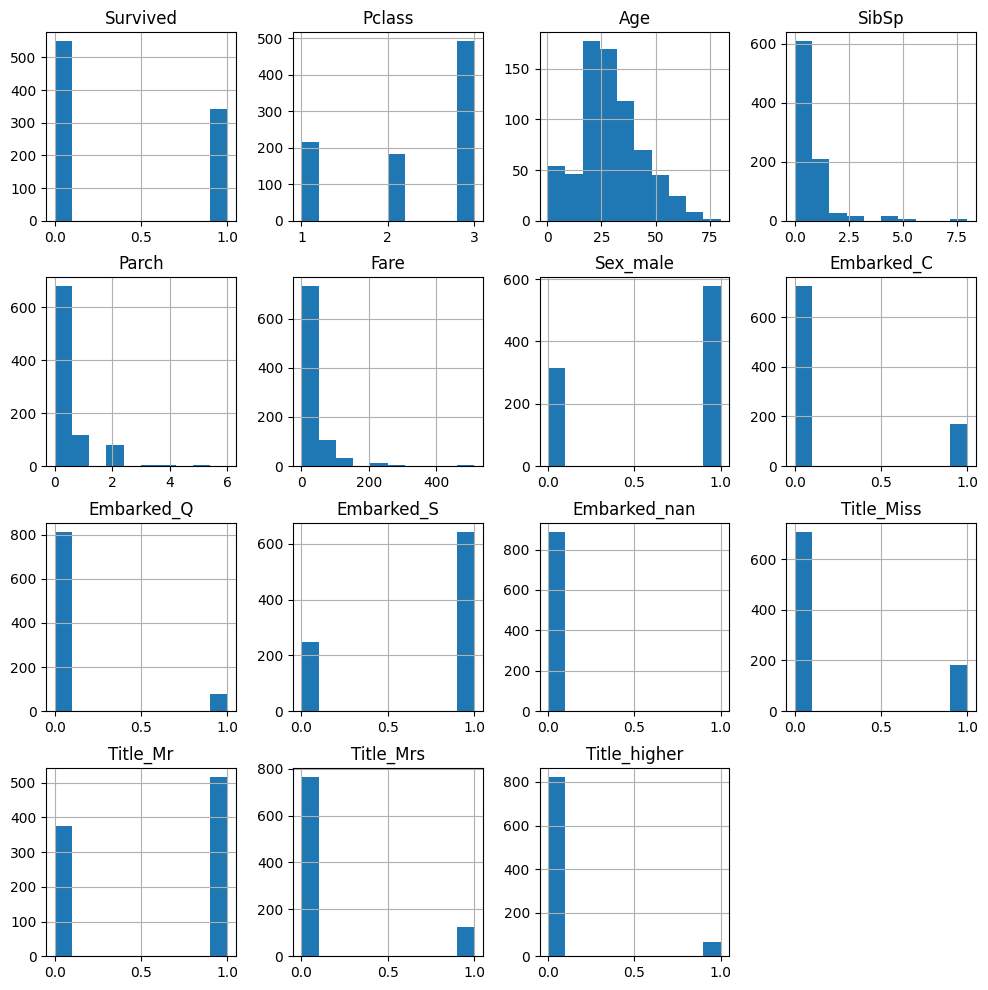

In [40]:
data_preprocessed.hist(figsize=(12,12));

<Axes: >

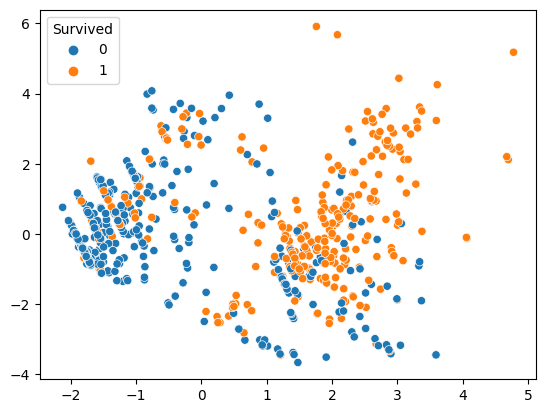

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
pca = PCA(n_components=2)

pipeline = make_pipeline(
    imputer,
    scaler, # try running with and without scaler
    pca)

emb = pipeline.fit_transform(data_preprocessed.drop(columns="Survived"))

sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=data_preprocessed["Survived"])

<Axes: >

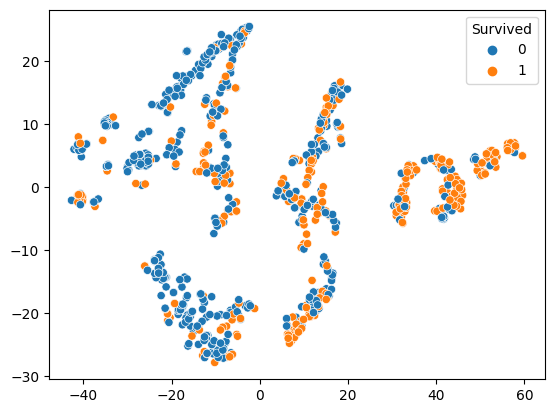

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
tsne = TSNE(n_components=2, init="pca", learning_rate="auto")

pipeline = make_pipeline(
    imputer,
    # scaler, # try running with and without scaler
    tsne)
emb = pipeline.fit_transform(data_preprocessed.drop(columns="Survived"))

sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=data_preprocessed["Survived"])

In [ ]:
# check outliers: Should we remove them? In this case they are valid samples so we keep them.
idx_outlier = emb[:,0] > 100
data_preprocessed[idx_outlier]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_higher
PassengerId,,,,,,,,,,,,,,,


<Axes: >

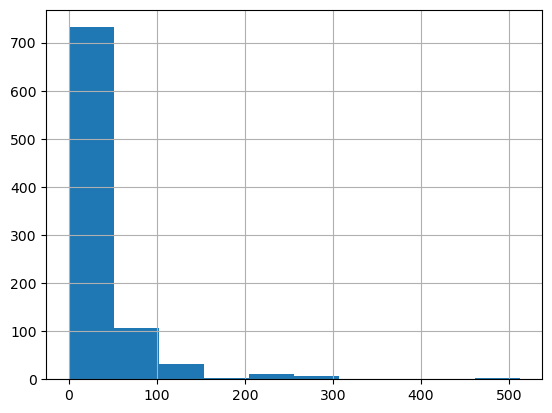

In [ ]:
data_preprocessed.Fare.hist()

### Check for batch effect

<Axes: >

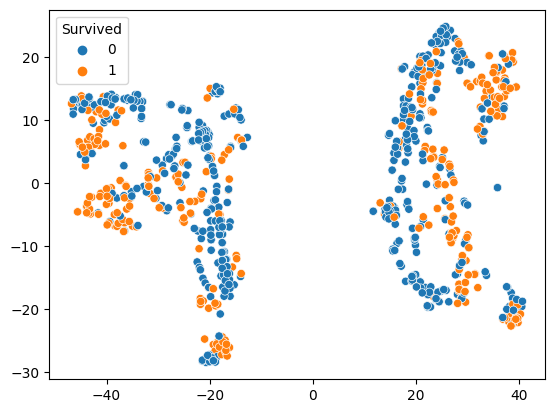

In [43]:
# A batch effect refers to a separation of the samples with respect to their data structure.
# In such cases it may be problematic to fit models (particular linear models).
# It may occur of for example the measurement device detoriates over time.
# This is not good because the resulting model needs meaningful information about the batches which are often not available,
# since the model it is hard to specify how "detoriated" a measurement device is and what effects that has on the measurements.
# Also see: https://www.molmine.com/magma/global_analysis/batch_effect.html

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline

imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()
tsne = TSNE(n_components=2, init="pca", learning_rate="auto")

pipeline = make_pipeline(
    imputer,
    scaler,
    tsne)

# regular data
# X = data_preprocessed.drop(columns="Survived")

# force batch effect
XX = data_preprocessed.drop(columns="Survived")
XX.iloc[:int(XX.shape[0] / 2),:] += 10

emb = pipeline.fit_transform(XX)

sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=data_preprocessed["Survived"])

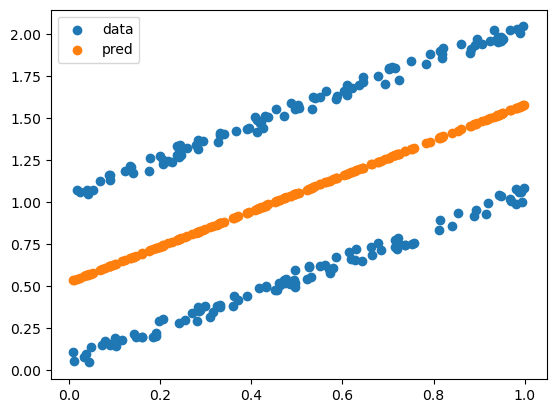

In [ ]:
# simple batch effect example

X_batch1 = np.random.random(100).reshape(-1, 1)
y_batch1 = X_batch1.flatten() + np.random.random(X_batch1.shape[0]) / 10

# this batch has a systematic shift upwards
X_batch2 = np.random.random(100).reshape(-1, 1)
y_batch2 = X_batch2.flatten() + np.random.random(X_batch2.shape[0]) / 10 + 1

X = np.concatenate([X_batch1, X_batch2])
y = np.concatenate([y_batch1, y_batch2])

# only if information about the batch is added things work again (not guaranteed, particualrly in less systematic cases!)
# BUT what about the next batch that has not been part of the training?
# X = np.concatenate([X, np.repeat([1,2], (X_batch1.shape[0], X_batch2.shape[0])).reshape(-1, 1)], axis=1)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X[:,0], y.flatten(), label="data")
plt.scatter(X[:,0], y_pred, label="pred")
plt.legend()

## Model Training

In [ ]:
# before inspecting the data, selecting and building models, etc.
# FIRST split data into train and test data (we set the test data size to 30%)
from sklearn.model_selection import train_test_split

X = data_preprocessed.drop(columns="Survived")
y = data_preprocessed["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [ ]:
# PIPELINES
# pipelines allow to combine a multitude of steps like normalization, standardization, missing value handling (imputation) into a single model
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# will handle missing values (e.g., for Age)!
imputer = SimpleImputer(strategy="median")

# will standardize the input (subtract mean, devide by standard deviation)
scaler = StandardScaler()

# our model
model_lr = LogisticRegression()

pipeline_lr = make_pipeline(imputer, scaler, model_lr)
evaluate(pipeline_lr)

,fit_time,score_time,test_score,train_score
0,0.020573,0.009685,0.822115,0.819277
1,0.032311,0.007018,0.783654,0.833735
2,0.017362,0.003122,0.816425,0.805288


'Train (accuracy): 0.82 +/- 0.01'

'Test  (accuracy): 0.81 +/- 0.02'

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

imputer = SimpleImputer(strategy="median")
model_rf = RandomForestClassifier()

pipeline_rf = make_pipeline(imputer, model_rf)
evaluate(pipeline_rf)

,fit_time,score_time,test_score,train_score
0,0.161792,0.013046,0.817308,0.985542
1,0.181984,0.012350,0.769231,0.987952
2,0.180660,0.012550,0.787440,0.978365


'Train (accuracy): 0.98 +/- 0.00'

'Test  (accuracy): 0.79 +/- 0.02'

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

imputer = SimpleImputer(strategy="median")
model_tree = DecisionTreeClassifier(max_depth=3)

pipeline_tree = make_pipeline(imputer, model_tree)
evaluate(pipeline_tree)

,fit_time,score_time,test_score,train_score
0,0.005984,0.002452,0.826923,0.802410
1,0.005322,0.002101,0.778846,0.843373
2,0.005532,0.002116,0.758454,0.822115


'Train (accuracy): 0.82 +/- 0.02'

'Test  (accuracy): 0.79 +/- 0.04'

Our models are now (`accuracy=0.80`) way better then previously (`accuracy=0.70`).